<a href="https://colab.research.google.com/github/hoangminhanh/twsm-homework/blob/main/HW8_MiningSocialGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweet-preprocessor 
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
from preprocessor.api import clean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sotu_retweets = pd.read_csv('https://assets.datacamp.com/production/repositories/2161/datasets/51e79668580cdb86969c2c625172eaed2ded684a/sotu2018-rt.csv')
sotu_retweets.head()

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,...,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
0,NaN,NaN,Wed Jan 31 03:51:59 +0000 2018,NaN,0,False,low,NaN,958548390052179968,958548390052179968,...,False,A PERFECT ANALOGY:\n\nSeveral democrats are br...,A PERFECT ANALOGY:\n\nSeveral democrats are br...,ScottPresler,"<a href=""http://twitter.com/download/iphone"" r...",RT @ScottPresler: A PERFECT ANALOGY:\n\nSevera...,1517370719813,False,MatthewJAld,NaN
1,NaN,NaN,Wed Jan 31 03:55:33 +0000 2018,NaN,0,False,low,NaN,958549287285215232,958549287285215232,...,False,NaN,President Trump invited families of Americans ...,RealJack,"<a href=""http://twitter.com/download/android"" ...",RT @RealJack: President Trump invited families...,1517370933730,False,broussard_sr,NaN
2,NaN,NaN,Wed Jan 31 03:09:22 +0000 2018,NaN,0,False,low,NaN,958537665334296577,958537665334296577,...,False,NaN,Don't you be fooled by any of his White Suprem...,UNITEDWEDREAM,"<a href=""http://twitter.com/download/iphone"" r...",RT @UNITEDWEDREAM: Don't you be fooled by any ...,1517368162841,False,CLSTEPHANY,NaN
3,NaN,NaN,Wed Jan 31 02:36:19 +0000 2018,NaN,0,False,low,NaN,958529347828305921,958529347828305921,...,False,NaN,Uh-oh. Our president mentioned the FIRST and S...,TomiLahren,"<a href=""http://twitter.com/download/iphone"" r...",RT @TomiLahren: Uh-oh. Our president mentioned...,1517366179793,False,DAWNSTUTESMAN,NaN
4,NaN,NaN,Wed Jan 31 02:46:24 +0000 2018,NaN,0,False,low,NaN,958531885424173057,958531885424173057,...,False,"Tonight isn't about memos, fake news, free thi...","Tonight isn't about memos, fake news, free thi...",TomiLahren,"<a href=""http://twitter.com/download/android"" ...","RT @TomiLahren: Tonight isn't about memos, fak...",1517366784803,False,SCischk,NaN


In [ ]:
sotu_retweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   contributors                               0 non-null      float64
 1   coordinates                                0 non-null      float64
 2   created_at                                 2340 non-null   object 
 3   extended_entities                          283 non-null    object 
 4   favorite_count                             2340 non-null   int64  
 5   favorited                                  2340 non-null   bool   
 6   filter_level                               2340 non-null   object 
 7   geo                                        0 non-null      float64
 8   id                                         2340 non-null   int64  
 9   id_str                                     2340 non-null   int64  
 10  in_reply_to_screen_name 

In [ ]:
# Restrict the data frame to rows where either 'user-screen_name' or 'retweeted_status-user-screen_name' equals to ‘FoxNews’

sotu_retweets_Fox = sotu_retweets[(sotu_retweets["user-screen_name"] == 'FoxNews') | (sotu_retweets["retweeted_status-user-screen_name"] == 'FoxNews')]
sotu_retweets_Fox

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,...,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
52,NaN,NaN,Wed Jan 31 03:14:11 +0000 2018,NaN,0,False,low,NaN,958538876695523328,958538876695523328,...,False,".@POTUS: ""Terrorists who do things like place ...",".@POTUS: ""Terrorists who do things like place ...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""Terrorists who do thing...",1517368451652,False,coachfoster15,NaN
55,NaN,NaN,Wed Jan 31 02:52:54 +0000 2018,NaN,0,False,low,NaN,958533520988753923,958533520988753923,...,False,".@POTUS: ""For decades, open borders have allow...",".@POTUS: ""For decades, open borders have allow...",FoxNews,"<a href=""http://twitter.com/#!/download/ipad"" ...","RT @FoxNews: .@POTUS: ""For decades, open borde...",1517367174752,False,VoseJim,NaN
58,NaN,NaN,Wed Jan 31 03:06:20 +0000 2018,NaN,0,False,low,NaN,958536901211967489,958536901211967489,...,False,".@POTUS: ""We celebrate our police, our militar...",".@POTUS: ""We celebrate our police, our militar...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We celebrate our police...",1517367980660,False,slewis8353,NaN
73,NaN,NaN,Wed Jan 31 03:16:53 +0000 2018,NaN,0,False,low,NaN,958539556155994112,958539556155994112,...,False,.@POTUS: “Let’s begin tonight by recognizing t...,.@POTUS: “Let’s begin tonight by recognizing t...,FoxNews,"<a href=""http://twitter.com/download/android"" ...",RT @FoxNews: .@POTUS: “Let’s begin tonight by ...,1517368613648,False,TravarL,NaN
84,NaN,NaN,Wed Jan 31 03:36:51 +0000 2018,NaN,0,False,low,NaN,958544581058064384,958544581058064384,...,False,".@POTUS: ""We repealed the core of disastrous #...",".@POTUS: ""We repealed the core of disastrous #...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We repealed the core of...",1517369811678,False,kujayhawksone66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,NaN,NaN,Wed Jan 31 02:04:59 +0000 2018,"{'media': [{'id': 958520419908313090, 'id_str'...",0,False,low,NaN,958521462540808192,958521462540808192,...,False,NaN,.@POTUS's Cabinet arrives. #SOTU https://t.co/...,FoxNews,"<a href=""http://twitter.com/download/android"" ...",RT @FoxNews: .@POTUS's Cabinet arrives. #SOTU ...,1517364299794,False,TimTheTruckerCA,NaN
2210,NaN,NaN,Wed Jan 31 03:43:57 +0000 2018,NaN,0,False,low,NaN,958546368225857536,958546368225857536,...,False,NaN,'Legend from Louisiana': Trump Honors 2017's A...,FoxNews,"<a href=""http://twitter.com/download/iphone"" r...",RT @FoxNews: 'Legend from Louisiana': Trump Ho...,1517370237772,False,ggary59,NaN
2218,NaN,NaN,Wed Jan 31 02:36:19 +0000 2018,NaN,0,False,low,NaN,958529347442405376,958529347442405376,...,False,".@POTUS: ""Working with the Senate, we are appo...",".@POTUS: ""Working with the Senate, we are appo...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""Working with the Senate...",1517366179701,False,Chelseax05,NaN
2237,NaN,NaN,Wed Jan 31 02:55:58 +0000 2018,NaN,0,False,low,NaN,958534292170334209,958534292170334209,...,False,NaN,".@POTUS: ""Let's support working families by su...",FoxNews,"<a href=""http://twitter.com/download/android"" ...","RT @FoxNews: .@POTUS: ""Let's support working f...",1517367358616,False,rob_radams20,NaN


user-screen_name = The username of the retweeter 

retweeted_status-user-screen_name = The username of the original tweeter

In [ ]:
# How many times was FoxNews retweeted? 
len(sotu_retweets_Fox[sotu_retweets_Fox["retweeted_status-user-screen_name"] == 'FoxNews'])

128

In [ ]:
# how many times did they retweet some other user?
len(sotu_retweets_Fox[sotu_retweets_Fox['user-screen_name'] == 'FoxNews'])

1

# PART A

In [ ]:
G_rt = nx.from_pandas_edgelist( sotu_retweets_Fox, source ='retweeted_status-user-screen_name', target = 'user-screen_name', create_using = nx.DiGraph())

The function above returns a graph with edge list with the source node being the user being retweeted and the target nodes are the retweeters

In [ ]:
# The number of nodes in G_rt 
len(G_rt.nodes())

130

In [ ]:
# The number of edges in G_rt 
len(G_rt.edges())

129

In [ ]:
# The degree of node "FoxNews"
G_rt.degree['FoxNews']

129

Degree specifies the number of edges go into/out of that nodes

# PART B

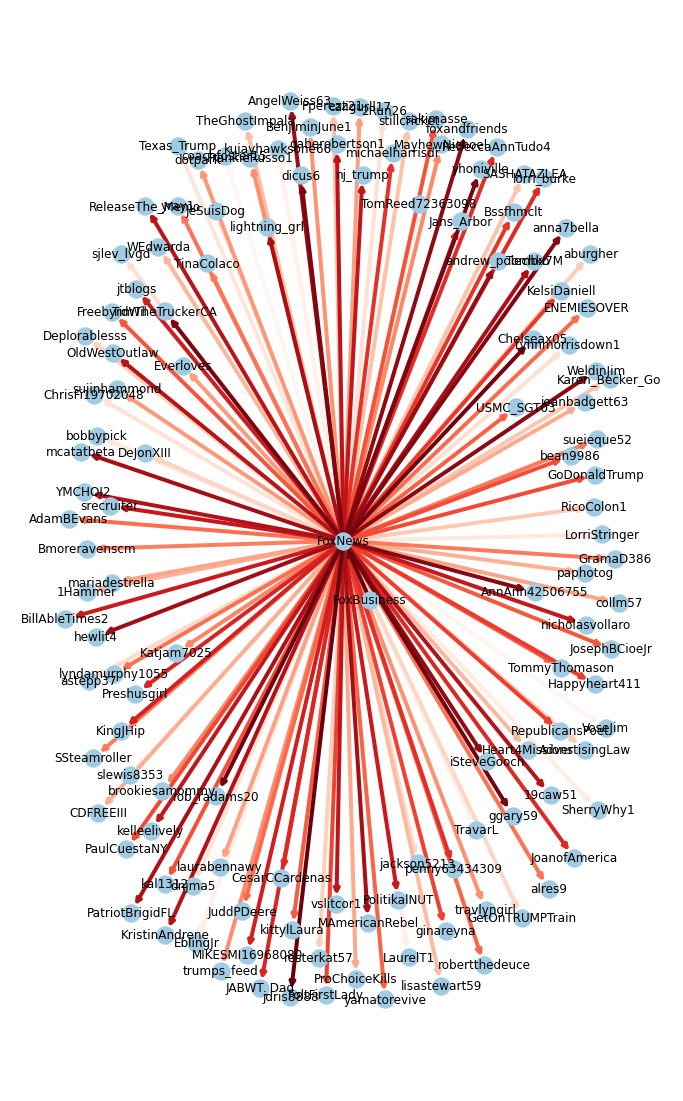

In [ ]:
plt.figure(figsize=(12,20)) 
pos = nx.spring_layout(G_rt,k=0.20,iterations=20)
colors = range(129)
nx.draw_networkx(G_rt,pos,arrows=True, node_color='#A0CBE2', 
edge_color=colors, width=4, edge_cmap=plt.cm.Reds, with_labels=True)
plt.axis('off') 
plt.show()

# PART C

In [ ]:
G_rt_all = nx.from_pandas_edgelist(sotu_retweets, source ='retweeted_status-user-screen_name', target = 'user-screen_name', create_using = nx.DiGraph())

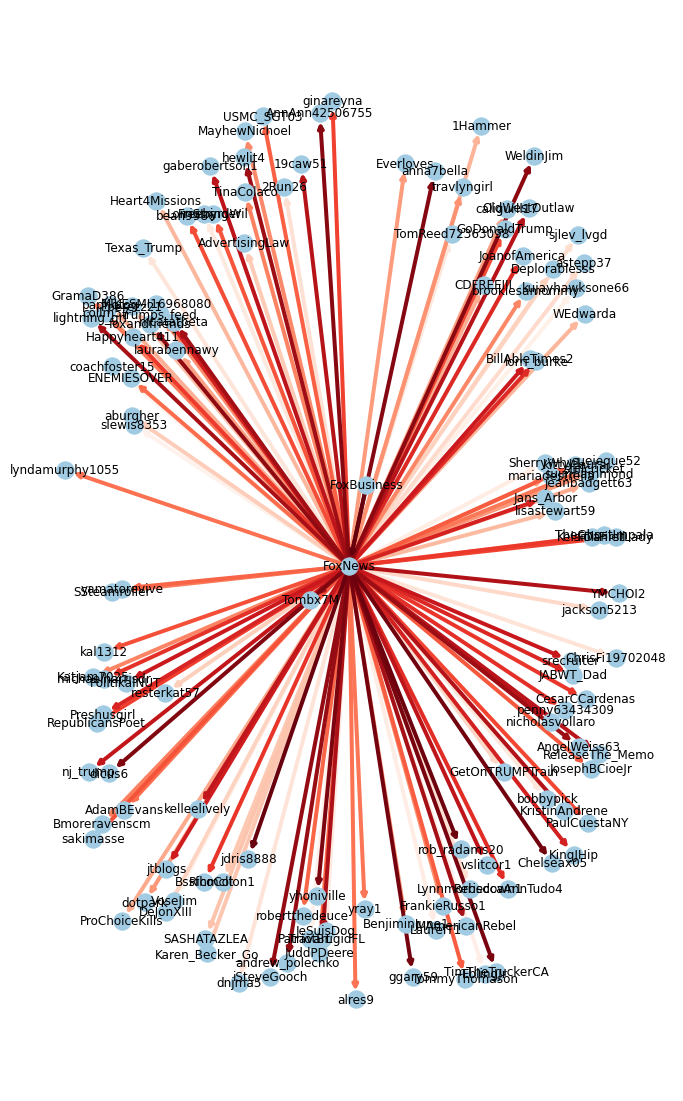

In [ ]:
plt.figure(figsize=(12,20)) 
pos = nx.spring_layout(G_rt_all,k=0.20,iterations=20)
colors = range(129)
nx.draw_networkx(G_rt,pos,arrows=True, node_color='#A0CBE2', 
edge_color=colors, width=4, edge_cmap=plt.cm.Reds, with_labels=True)
plt.axis('off') 
plt.show()

In [ ]:
# The top five users who were retweeted the most
sorted(nx.out_degree_centrality(G_rt_all).items(), key=lambda x: x[1], reverse=True)[:5]

[('FoxNews', 0.05599300087489064),
 ('WhiteHouse', 0.031058617672790903),
 ('ScottPresler', 0.029746281714785654),
 ('TomiLahren', 0.01968503937007874),
 ('KyleKulinski', 0.01706036745406824)]

In [ ]:
# The top five users who  retweeted  other  users  the  most
sorted(nx.in_degree_centrality(G_rt_all).items(), key=lambda x: x[1], reverse=True)[:5]

[('nljac000', 0.0021872265966754157),
 ('thedreadedaw', 0.0017497812773403325),
 ('debra_bonanno', 0.0017497812773403325),
 ('aedaw9i', 0.0017497812773403325),
 ('SteveJa39296543', 0.0017497812773403325)]

# PART D

In [ ]:
rt_centrality = nx.betweenness_centrality(G_rt_all) 

In [ ]:
# The top five users with the highest betweenness centrality

sorted(rt_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('FoxNews', 2.5653248486171177e-05),
 ('Public_Citizen', 9.189223338329973e-06),
 ('ChristiChat', 5.16893812781061e-06),
 ('guypbenson', 4.594611669164987e-06),
 ('johncardillo', 4.020285210519363e-06)]

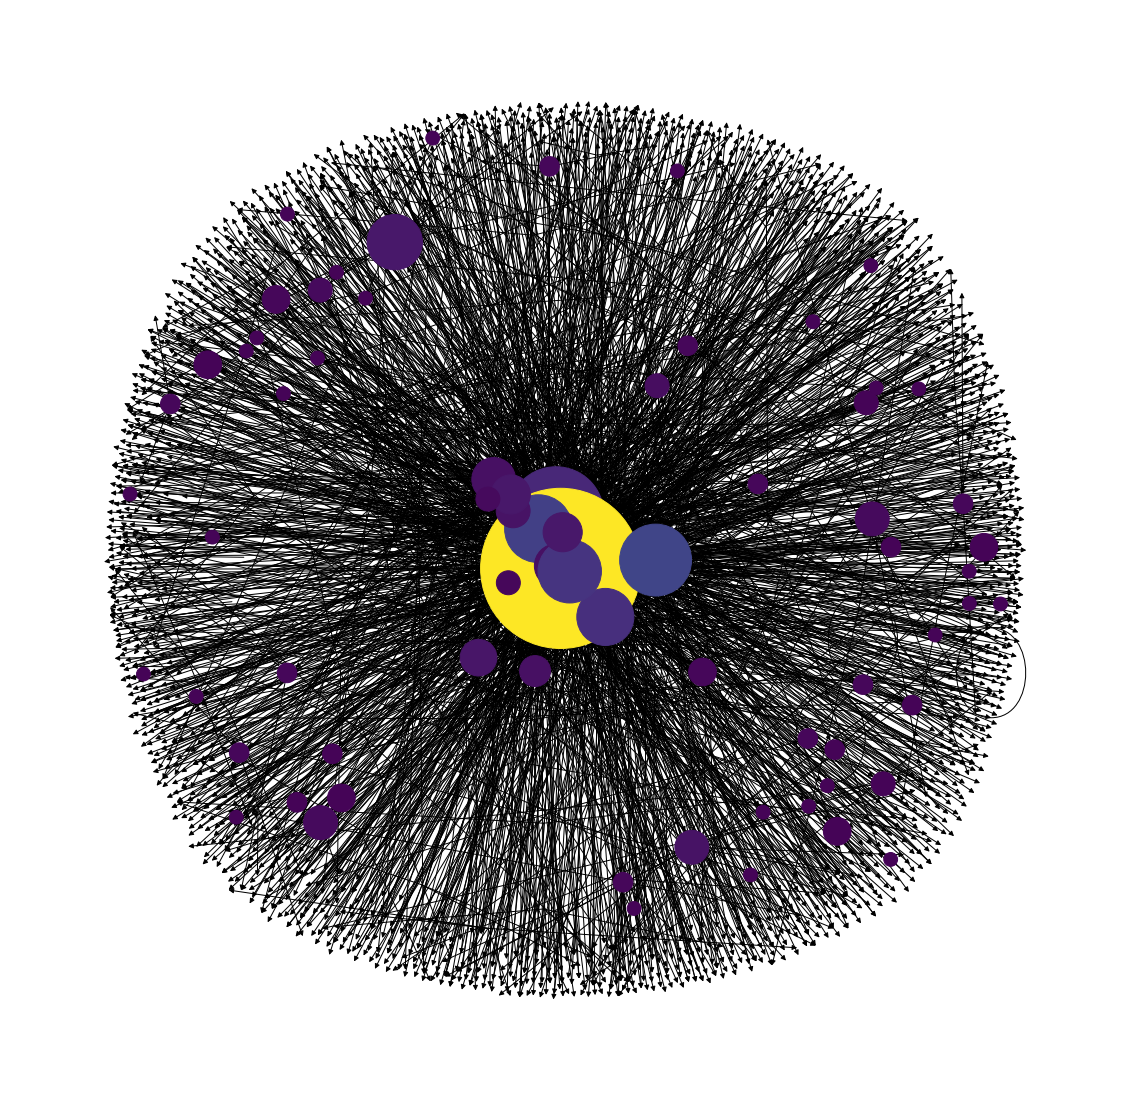

In [ ]:
node_color = [200000000.0 * G_rt_all.out_degree(v) for v in G_rt_all] 
node_size =  [v * 1000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_rt_all, with_labels=False,node_color=node_color, node_size=node_size )
plt.axis('off') 
plt.show()

According to the code, the node color represents the out degree centrality of the node, meaning that: the yello node is the one that has the highest number of edges going out of it. 

In [ ]:
# User with the highest out degree centrality 
sorted(nx.out_degree_centrality(G_rt_all).items(), key=lambda x: x[1], reverse=True)[:1]

[('FoxNews', 0.05599300087489064)]

The size of the node corresponds to the betweeness centrality. The biggest node is the most influential node in the graph, as most shortest direct paths have to pass through it. 

In [ ]:
# User with the highest betweeness centrality 
sorted(rt_centrality.items(), key=lambda x: x[1], reverse=True)[:1]

[('FoxNews', 2.5653248486171177e-05)]